In [4]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from transformers_interpret import ImageClassificationExplainer
from PIL import Image
import requests
import numpy as np

model_name = "google/vit-base-patch16-224"
model = AutoModelForImageClassification.from_pretrained(model_name)
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)

# With both the model and feature extractor initialized we are now able to get explanations on an image, we will use a simple image of a golden retriever.
image_link = "https://upload.wikimedia.org/wikipedia/commons/b/bd/Golden_Retriever_Dukedestiny01_drvd.jpg"

image = Image.open(requests.get(image_link, stream=True).raw)

image = np.array(image)

image_classification_explainer = ImageClassificationExplainer(model=model, feature_extractor=feature_extractor)

image_attributions = image_classification_explainer(
    image
)

print(image_attributions.shape)

c:\Users\ezrat\anaconda3\envs\Standard\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


(1, 3, 224, 224)


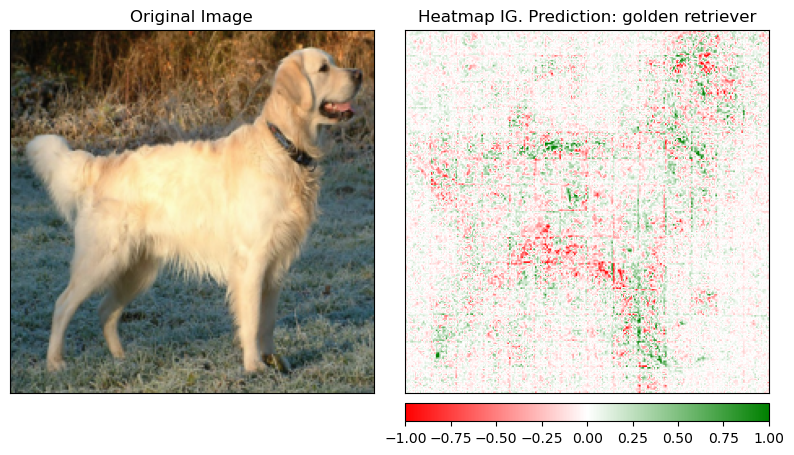

(<Figure size 800x600 with 4 Axes>,
 array([<Axes: title={'center': 'Original Image'}>,
        <Axes: title={'center': 'Heatmap IG. Prediction: golden retriever'}>],
       dtype=object))

In [5]:
image_classification_explainer.visualize(
    method="heatmap",
    side_by_side=True,
    outlier_threshold=0.03

)